# [W142] Jupyter Notebook Tutorial - Out of School Children Rate in Uganda

Estimated Time: 90 Minutes

Created by: Yidan Zhang

Modified by: Enrique Valencia López


Today we will examine data from The World Inequality Database on Education (WIDE) to explore the powerful influence of social categories (such as wealth, gender, ethnicity, and location) on children's opportunities for a quality education and life.

You will use this international dataset to begin to identify, through analysis and data visualizations, the educational disparities between groups of children in a specific country you have chosen. 

This Notebook serves as an example and tutorial of some data analysis and visualization techniques. You will be completing a similar Notebook for this week's assignment to tell us about the extent of educational disparities in the country you selected. 





## Jupyter Notebook Basics

This webpage is a Jupyter “notebook”. We have created this specific notebook so that you can run code in order to perform data analysis and answer questions aimed at identifying barriers to a quality education. The process of identifying the most marginalized can be broken down into 3 steps: The first is collecting disaggregated data for key indicators, the next is to identify target groups through analyzing and triangulating data, and the final step is to explore why educational marginalization takes place so that you can come up with an action plan. In this tutorial, we will walk you through the first two steps.

In a Jupyter notebook, cells are the boxes that you can populate with text for explanation or code to run a statistical analysis or create visualizations. 


To insert a cell, click the + button in the toolbar at the top of this webpage, or click insert.

To select a cell type, click on the Cell in the tool bar, then cell type. Cell type "code" is for any cell containing codes, and the cell type "markdown" is for any cell containing texts, like this one. 

To edit a cell, double click it. 

To run a cell, click the cell and press Shift + Enter while the cell is selected or hit the ▶| Run button in the toolbar at the top.

NOTE: In this tutorial, we will ask you to “run” functions as you go along. You won’t always see any changes within the cell. However, keep in mind that the program is running analyses in the background and in some instances will generate an output for you to look at.  

To download a Notebook as a pdf file, click on File in the toolbar, then Download as, then select pdf(.pdf). This will download the notebook to your computer in the pdf format. You can submit the pdf version of the assignment notebook.

Python is the programming language that we will use in this lab. Although this lab will go over some basics, should you be more interested in learning Python feel free to check out the following resources:

1. [Python Tutorial](https://docs.python.org/3.5/tutorial/): Introduction to Python from the creators of Python
2. [Composing Programs](http://composingprograms.com/pages/11-getting-started.html): An introduction to programming with Python from CS 61A
3. [Panda tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html):10 minutes to pandas

## Preparation

In this Notebook, we will go over simple techniques in Python that you can use to perform your analysis and create visualizations!


First on our agenda is to import **<font color = ##008700>dependencies</font>** -- or packages in Python that add to the basic functions in Python. Kind of like accessorizing! For example, `matplotlib` allows us to generate graphs.



In [3]:
#Just run this cell by click the cell and press Shift + Enter while the cell is selected 
#or hit the ▶| Run button in the toolbar at the top

%matplotlib inline
import pandas as pd
import numpy as np
from datascience import *
import matplotlib.pyplot as plots
import math as m
import qgrid as q
import pandas as pd
import sys
sys.path.insert(0, "development")
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML

## <font color = #254117>Section 1: Data Cleaning</font>
In this section, we will cover some essential functions that are useful for data cleaning. Data cleaning allows us to ensure that our data is complete and accurate. Cleaning your data will ensure that your data set has no missing, duplicate, or other erroneous values that might mislead your analysis. In order to begin filtering through information stored in a dataset, we will have to "read in" the information. Most of the time, information to be displayed as a table is stored as a `.csv` file which stands for **<font color = ##008700>comma separated values</font>**, a file format that is easily readable by data analysis software.

The WIDE dataset we will be using in this course is already downloaded to your Jupyter Folder.

To read in a file that is in your folder, we use the following command:

`pd.read_csv('file_name.csv')`

and in order to store it, we'll assign it a name or label. We can also run the dataset by downloading it from the linl available on the WIDE website. We run this code:

In [1]:
# Just run this code block! This code reads in our WIDE dataset and label it as "wide". 

!wget https://us-east-1-unesco-wide.s3.us-east-1.amazonaws.com/WIDE_2021-01-28_v1.csv -q --show-progress
!wget https://us-east-1-unesco-wide.s3.us-east-1.amazonaws.com/WIDE_metadata_2021-01-29.csv -q --show-progress

WIDE_2021-01-28_v1. 100%[===================>]  50.58M  71.1MB/s    in 0.7s    
WIDE_metadata_2021- 100%[===================>] 268.41K  --.-KB/s    in 0.1s    


We then name the dataset we are going to use as 'wide'

In [4]:
wide=pd.read_csv("WIDE_2021-01-28_v1.csv", low_memory=False)

**<font color = #254117>Table Manipulations</font>**

In [7]:
#lets look at the first 3 rows of our dataset by running this cell
wide.head(3)

,iso_code,region_group,income_group,country,survey,year,level,grade,category,Sex,...,rlevel3_m,rlevel3_no,slevel3_m,slevel3_no,mlevel4_m,mlevel4_no,rlevel4_m,rlevel4_no,slevel4_m,slevel4_no
0,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`yourdata.loc[]` is a function that helps us select certain rows, columns, or a combination of rows and columns from a larger dataset. The following are some examples of how it can be used. Make sure to replace `yourdata` in the function with the name of your dataset. 

In [8]:
# Getting the same disply as wide.head(3) with a different method by running this cell
wide.loc[[0,1,2],:] 

,iso_code,region_group,income_group,country,survey,year,level,grade,category,Sex,...,rlevel3_m,rlevel3_no,slevel3_m,slevel3_no,mlevel4_m,mlevel4_no,rlevel4_m,rlevel4_no,slevel4_m,slevel4_no
0,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Since we want a range of rows, we could also use the following:
wide.loc[0:2,:] 

,iso_code,region_group,income_group,country,survey,year,level,grade,category,Sex,...,rlevel3_m,rlevel3_no,slevel3_m,slevel3_no,mlevel4_m,mlevel4_no,rlevel4_m,rlevel4_no,slevel4_m,slevel4_no
0,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Now lets try to select columns by column name by running this cell
wide.loc[:, "country"]

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
212964            NaN
212965            NaN
212966            NaN
212967            NaN
212968            NaN
Name: country, Length: 212969, dtype: object

In [11]:
## We can print the list of countries included in this dataset by asking for unique values or the country column
## Run this cell
countrynames = wide["country"].unique()
countrynames

array(['Afghanistan', 'Angola', 'Albania', 'U. A. Emirates', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Burundi',
       'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria',
       'Bahrain', 'Bosnia/Herzeg.', 'Belarus', 'Belize', 'Bolivia',
       'Brazil', 'Barbados', 'Bhutan', 'Botswana', 'C. A. R.', 'Canada',
       'Switzerland', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'D. R. Congo', 'Congo', 'Colombia', 'Comoros', 'Costa Rica',
       'Cuba', 'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Denmark',
       'Dominican Rep.', 'Algeria', 'Ecuador', 'Egypt', 'Spain',
       'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia',
       'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equat. Guinea',
       'Greece', 'Guatemala', 'Guyana', 'Hong Kong, China', 'Honduras',
       'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'India', 'Ireland',
       'Iran, Isl. Rep.', 'Iraq', 'Iceland', 'Israel', 'Italy', 'Jamaica',
       'Jordan', '

Next we print all column names: you should refer to the [data note](https://us-east-1-unesco-wide.s3.amazonaws.com/About%20WIDE.pdf) from the WIDE website to see what each column denotes


In [12]:
## Run this cell
wide.columns

Index(['iso_code', 'region_group', 'income_group', 'country', 'survey', 'year',
       'level', 'grade', 'category', 'Sex', 'Location', 'Wealth', 'Region',
       'Ethnicity', 'Religion', 'Language', 'comp_prim_v2_m',
       'comp_lowsec_v2_m', 'comp_upsec_v2_m', 'comp_prim_1524_m',
       'comp_lowsec_1524_m', 'comp_upsec_2029_m', 'eduyears_2024_m',
       'edu2_2024_m', 'edu4_2024_m', 'eduout_prim_m', 'eduout_lowsec_m',
       'eduout_upsec_m', 'comp_prim_v2_no', 'comp_lowsec_v2_no',
       'comp_upsec_v2_no', 'comp_prim_1524_no', 'comp_lowsec_1524_no',
       'comp_upsec_2029_no', 'eduyears_2024_no', 'edu2_2024_no',
       'edu4_2024_no', 'eduout_prim_no', 'eduout_lowsec_no', 'eduout_upsec_no',
       'preschool_3_m', 'preschool_3_no', 'preschool_1ybefore_m',
       'preschool_1ybefore_no', 'edu0_prim_m', 'edu0_prim_no', 'trans_prim_m',
       'trans_prim_no', 'trans_lowsec_m', 'trans_lowsec_no',
       'comp_higher_2yrs_2529_m', 'comp_higher_2yrs_2529_no',
       'comp_higher_4yrs_

Now let’s select our country of interest, and only display variables we might be interested in by running this cell. 

In this tutorial we will use the example of Uganda and conduct a gender analysis for this region only. 

As mentioned above, the first step in conducting a gender analysis is to identify important outcome indicators. The three important outcomes of interventions or programs aimed at promoting gender equality that are currently prioritized by many countries are:
1.	Reducing the number of lower secondary schools-aged girls out of school
2.	Increasing the number of marginalized girls completing lower secondary education
3.	Ensuring adolescent girls gain the skills and knowledge needed for personal empowerment, future learning, active citizenship, and employment. 

These three outcomes correspond with improving participation, completion, and learning outcomes respectively. These criteria will vary depending on the circumstances of each country but for your assignment we ask you to use the following criteria and will walk you through how to do so:

1. Out of school children rate
2. Completion rate
3. Transition rate from primary to secondary school
4. Over age primary school attandance rate

In [5]:
# Now lets select our country of interest, and only display variables we might be interested in by running this cell

# Here the markers of marginalization (or outcome variable) we will include are out of school children rate 
# at primary, lower secondary and upper secondary level
# The characteristics (or independent variable) we included are year, sex, wealth and location.

# This allows us to control for or ensure that we account for differences across these social categories which might
# influence our outcome and as we will explain later in this tutorial including these categories allows us to 
# disaggregate our data and better understand the context.
uganda = wide.loc[wide.country =='Uganda',['year','Sex','Wealth','Location','eduout_prim_m','eduout_lowsec_m',
       'eduout_upsec_m', 'comp_prim_v2_m', 'comp_lowsec_v2_m', 'comp_upsec_v2_m']]
uganda

,year,Sex,Wealth,Location,eduout_prim_m,eduout_lowsec_m,eduout_upsec_m,comp_prim_v2_m,comp_lowsec_v2_m,comp_upsec_v2_m
120978,2001.0,NaN,NaN,Rural,0.1257,0.1980,0.6219,0.3292,0.0837,0.0689
120979,2001.0,NaN,NaN,Urban,0.0996,0.2283,0.5218,0.6930,0.3558,0.2826
120980,2001.0,NaN,NaN,Rural,0.1678,0.2804,0.6582,0.2724,0.0286,0.0253
120981,2001.0,NaN,NaN,Rural,0.0952,0.1725,0.8170,0.3472,0.0423,0.0753
120982,2001.0,NaN,NaN,Rural,0.1276,0.2016,0.5468,0.3585,0.1052,0.1246
...,...,...,...,...,...,...,...,...,...,...
173562,2000.0,Male,Quintile 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173577,2000.0,NaN,Quintile 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173579,2007.0,NaN,NaN,Urban,NaN,NaN,NaN,NaN,NaN,NaN
173581,2007.0,Male,Quintile 3,Urban,NaN,NaN,NaN,NaN,NaN,NaN


You might have noticed the "NaN" entries in the table. NaN stands for "Not a Number," however, conceptually, NaN means missing value. Now that we have selected our outcome indicator and dependent variables, and narrowed down on the country, we need to handle the missing data before we do any other analysis or visualization. 

Generally speaking, there are several different ways to handle missing data, but for your assignment we are aking you to handle missing data by deleting it, and will go over how to do so. 

In [6]:
#get number of missing values in each column by running this cell
uganda.isnull().sum()

year                  0
Sex                 319
Wealth              291
Location            529
eduout_prim_m       183
eduout_lowsec_m     278
eduout_upsec_m      440
comp_prim_v2_m      339
comp_lowsec_v2_m    397
comp_upsec_v2_m     427
dtype: int64

We can see that many of the columns we selected contains missing values. We have to delete these before we move on to graphs. 

In [7]:
#First lets check the shape of our dataset
uganda.shape 

(781, 10)

This means we currently have 781 rows and 10 columns in the dataset for Uganda. 

In [16]:
#drop all rows that contains a missing value by running this cell
uganda.dropna(how ='any').shape

(41, 10)

We can see that after deleting the missing values, we have only 41 rows left, comfirming that we deleted many missing values.

In [17]:
## Since we are confident that missing values are deleted, 
## we assign this new dataset a name and display it by running this cell
uganda = uganda.dropna(how ='any')
uganda

,year,Sex,Wealth,Location,eduout_prim_m,eduout_lowsec_m,eduout_upsec_m,comp_prim_v2_m,comp_lowsec_v2_m,comp_upsec_v2_m
121029,2006.0,Female,Quintile 1,Rural,0.2862,0.2925,0.7342,0.0826,0.0029,0.0094
121030,2006.0,Female,Quintile 2,Rural,0.2143,0.1740,0.6584,0.1255,0.0519,0.0240
121031,2006.0,Female,Quintile 3,Rural,0.1816,0.1570,0.5785,0.2063,0.0406,0.0439
121032,2006.0,Female,Quintile 4,Rural,0.1305,0.0696,0.5618,0.3007,0.0970,0.0361
121033,2006.0,Female,Quintile 5,Rural,0.1080,0.1227,0.3847,0.5783,0.3007,0.1173
121035,2006.0,Female,Quintile 5,Urban,0.0861,0.1911,0.4619,0.6914,0.4560,0.3170
121036,2006.0,Male,Quintile 1,Rural,0.2638,0.1864,0.4920,0.1004,0.0350,0.0186
121037,2006.0,Male,Quintile 2,Rural,0.1750,0.1613,0.4254,0.1138,0.0499,0.0705
121038,2006.0,Male,Quintile 3,Rural,0.1742,0.1525,0.4958,0.1816,0.0708,0.0410
121039,2006.0,Male,Quintile 4,Rural,0.1425,0.1470,0.4254,0.3045,0.1563,0.1248


For a more detailed tutorial on data selection and how to handle missing values, check out the following videos on YouTube if you are interested in exploring more:

*[Data Selection](https://www.youtube.com/watch?v=xvpNA7bC8cs)

*[Missing Values](https://www.youtube.com/watch?v=fCMrO_VzeL8)

### <center><font color = #254117>Congratulations! You've successfully cleaned the data you want to visualize!</font></center>

<center>We will now move onto the visualization. Make sure you understand the data cleaning process as we will be using the cleaned data in the parts that follow.</center>

## <font color = #254117>Section 2: Summary Statistics and Visualization </font>

First lets explore some ways to look at the summary statistics of the entire population by different survey year, using the groupby function.

In [12]:
# lets look at the overall mean out of school children rate at each level for Uganda, by survey year 
# Run this cell
uganda.groupby('year').mean()

,eduout_prim_m,eduout_lowsec_m,eduout_upsec_m,comp_prim_v2_m,comp_lowsec_v2_m,comp_upsec_v2_m
year,,,,,,
2006.0,0.162917,0.151808,0.495242,0.326275,0.161617,0.110125
2011.0,0.098707,0.170736,0.575036,0.448086,0.269236,0.156293
2016.0,0.121507,0.269753,0.644587,0.468487,0.280987,0.178047


In [8]:
# We can also filter the data by year first, and then compute the mean by running this cell. 
# This result should be the same as the lower left cell in the table above.
uganda[uganda.year==2016].eduout_prim_m.mean()

0.12817037037037038

Now let's plot the information in the above table in a line graph.

In [14]:
#Running this cell allows the plot to appear in the Notebook
%matplotlib inline

<AxesSubplot:xlabel='year'>

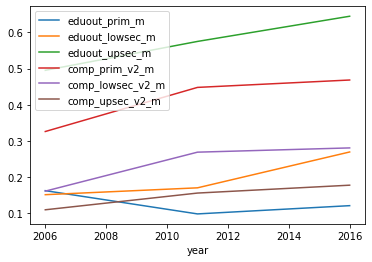

In [15]:
## Run this cell
uganda.groupby('year').mean().plot(kind='line')

But the label graph is hard to read. Partly this is because the legend is over the plot. We then move the legend outside the box:

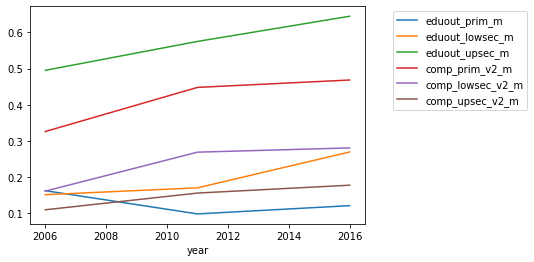

In [34]:
## Run this cell
uganda.groupby('year').mean().plot(kind='line').legend(bbox_to_anchor=(1.5, 1),loc='upper right')

## <font color = #254117>Disaggregate Data</font>
Disaggregating data allows us to identify specific clusters, patterns and barriers to education. It also allows us to identify the various groups of girls (and boys) who experience the most marginalization.  However, disaggregating gender data is only a first step. This disaggregation should be carried out along with other social categories. It is important to keep in mind that national data patterns may radically differ from global patterns and some gender disaggregated data can be deceiving due to measures used. Therefore data should also be triangulated through collecting (and thereby verifying) data from two or more sources. Data can be triangulated through collecting this information in numeric (through databases and other aggregated or disaggregated sources) and non-numeric form (through interviews, observations, surveys). The goal of triangulating data is to overcome the shortcoming and possible biases of relying on data from one source, which is important in conducting a gender analysis. You will use this tutorial to obtain statistics which you will later triangulate by conducting research on the context of the country of your choice.

Now we have seen the trend of OOSC in Uganda over the past three survey years, let's narrow down to the most recent year and explore the difference in OOSC for different genders, different locations and across wealth levels to find out the most marginalized children with regards to this indicator. 

In [35]:
# First, select only Uganda data from 2016 by running this cell
uganda16 = uganda.loc[uganda.year == 2016,['Sex','Wealth','Location','eduout_prim_m','eduout_lowsec_m',
       'eduout_upsec_m', 'comp_prim_v2_m',
       'comp_lowsec_v2_m', 'comp_upsec_v2_m']]
uganda16

,Sex,Wealth,Location,eduout_prim_m,eduout_lowsec_m,eduout_upsec_m,comp_prim_v2_m,comp_lowsec_v2_m,comp_upsec_v2_m
121536,Female,Quintile 1,Rural,0.2264,0.3537,0.8646,0.1717,0.0380,0.0285
121537,Female,Quintile 2,Rural,0.1237,0.2613,0.7997,0.2588,0.0916,0.0316
121538,Female,Quintile 3,Rural,0.1116,0.2455,0.6909,0.4525,0.1251,0.0630
121539,Female,Quintile 4,Rural,0.0956,0.1990,0.6450,0.5593,0.2527,0.1065
121540,Female,Quintile 5,Rural,0.0470,0.2939,0.6091,0.6361,0.4679,0.3642
121544,Female,Quintile 4,Urban,0.0659,0.2309,0.7867,0.6360,0.3513,0.1554
121545,Female,Quintile 5,Urban,0.0671,0.3597,0.6535,0.7406,0.5782,0.3693
121546,Male,Quintile 1,Rural,0.1871,0.2902,0.6559,0.2014,0.0837,0.0186
121547,Male,Quintile 2,Rural,0.1463,0.2472,0.5985,0.2805,0.1139,0.0813
121548,Male,Quintile 3,Rural,0.1136,0.2507,0.5385,0.3771,0.1882,0.0730


In [36]:
##If you want to add labels to your tables, you can always modify the name of the variable like this:

uganda2=uganda.loc[uganda.year == 2016,['Sex','Wealth','Location','eduout_prim_m','eduout_lowsec_m',
       'eduout_upsec_m']]
uganda2 = uganda2.rename(columns = {"eduout_prim_m":"Out of Primary","eduout_lowsec_m":"Out of Lower Sec","eduout_upsec_m":"Out of Upper Sec"}) 
uganda2

,Sex,Wealth,Location,Out of Primary,Out of Lower Sec,Out of Upper Sec
121536,Female,Quintile 1,Rural,0.2264,0.3537,0.8646
121537,Female,Quintile 2,Rural,0.1237,0.2613,0.7997
121538,Female,Quintile 3,Rural,0.1116,0.2455,0.6909
121539,Female,Quintile 4,Rural,0.0956,0.1990,0.6450
121540,Female,Quintile 5,Rural,0.0470,0.2939,0.6091
121544,Female,Quintile 4,Urban,0.0659,0.2309,0.7867
121545,Female,Quintile 5,Urban,0.0671,0.3597,0.6535
121546,Male,Quintile 1,Rural,0.1871,0.2902,0.6559
121547,Male,Quintile 2,Rural,0.1463,0.2472,0.5985
121548,Male,Quintile 3,Rural,0.1136,0.2507,0.5385


### <font color = #254117>Urban vs. Rural Locations</font>

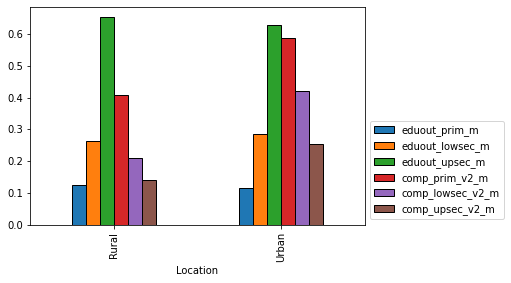

In [37]:
## By running this cell,  you produce a graph of the OOSC at each level between rural and urban locations
uganda16.groupby('Location').mean().plot(kind='bar').legend(bbox_to_anchor=(1, 0.5))

We can divide the plot into two graphs:

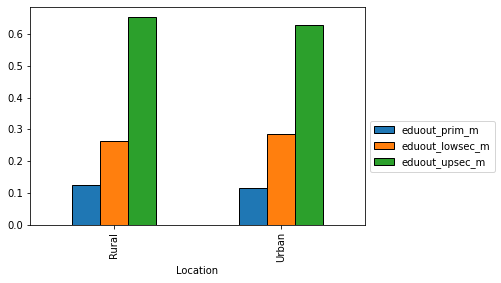

In [44]:
uganda16[['Location','eduout_prim_m','eduout_lowsec_m','eduout_upsec_m']].groupby('Location').mean().plot(kind='bar').legend(bbox_to_anchor=(1, 0.5))

What if we want to see the difference of OOSC by location and gender? We could create subplots and compare the genders side by side. 

Text(0.5, 1.0, 'Male')

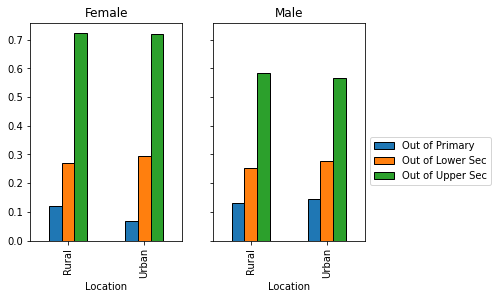

In [45]:
## plotting two subplots ax1 and ax2
fig, (ax1,ax2) = plots.subplots(nrows = 1, ncols = 2,sharex=True, sharey=True)
#use ax1 to plot girls
uganda2[uganda2['Sex']=='Female'].groupby('Location').mean().plot(kind = 'bar', ax = ax1, legend = False)
ax1.set_title("Female")
#use ax2 to plot boys
uganda2[uganda2['Sex']=='Male'].groupby('Location').mean().plot(kind = 'bar', ax = ax2).legend(bbox_to_anchor=(1, 0.5))
ax2.set_title("Male")


What if you want to reorganize the bars so you have a subplot for rural and a subplot for urban? 

Text(0.5, 1.0, 'Urban')

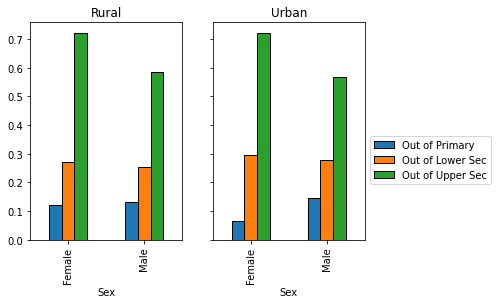

In [46]:
## plotting two subplots ax1 and ax2
fig, (ax1,ax2) = plots.subplots(nrows = 1, ncols = 2,sharex=True, sharey=True)
#use ax1 to plot rural
uganda2[uganda2['Location']=='Rural'].groupby('Sex').mean().plot(kind = 'bar', ax = ax1, legend = False)
ax1.set_title("Rural")
#use ax2 to plot urban
uganda2[uganda2['Location']=='Urban'].groupby('Sex').mean().plot(kind = 'bar', ax = ax2).legend(bbox_to_anchor=(1, 0.5))
ax2.set_title("Urban")

Please note that the two plots above actually present the same information, just organized in different ways. Depending on your research question, you might find one graph more informative than the other. But try to produce both for your assignment and compare them. 

### <font color = #254117>Wealth</font>

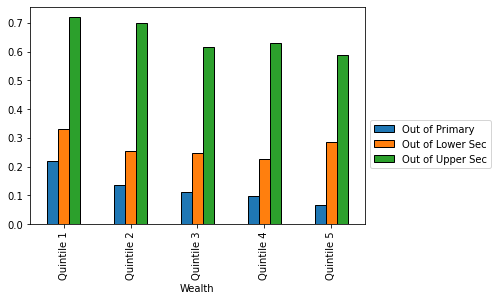

In [47]:
## By running this cell,  you produce a graph of the OOSC at each level for the 5 wealth quitiles
uganda2.groupby('Wealth').mean().plot(kind='bar').legend(bbox_to_anchor=(1, 0.5))

Next, lets plot the average OOSC by wealth and gender, using the same method.  

Text(0.5, 1.0, 'Male')

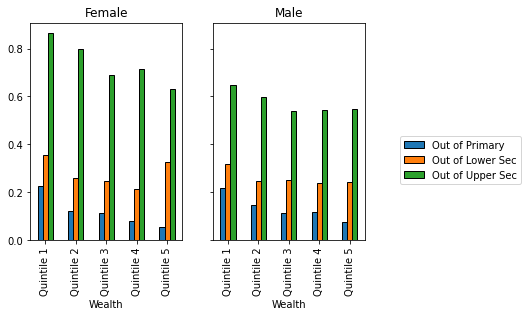

In [48]:
## plotting  two subplots ax1 and ax2
fig, (ax1,ax2) = plots.subplots(nrows = 1, ncols = 2,sharex = True, sharey = True)
#use ax1 to plot girls
uganda2[uganda2['Sex']=='Female'].groupby('Wealth').mean().plot(kind = 'bar', ax = ax1, legend = False)
ax1.set_title("Female")
#use ax2 to plot boys
uganda2[uganda2['Sex']=='Male'].groupby('Wealth').mean().plot(kind = 'bar', ax = ax2).legend(bbox_to_anchor=(1.2, 0.5))
ax2.set_title("Male")


Now lets reorganize the above OOSC plot by gender and wealth.

Text(0.5, 1.0, 'Quintile 5')

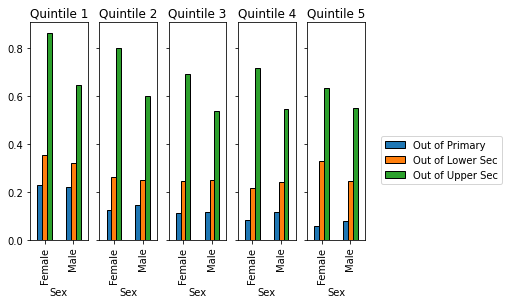

In [49]:
## plotting  two subplots ax1 ... ax5
fig, (ax1,ax2,ax3,ax4,ax5) = plots.subplots(nrows = 1, ncols = 5 ,sharex = True, sharey = True)
#use each ax to plot a quintile
uganda2[uganda16['Wealth']=='Quintile 1'].groupby('Sex').mean().plot(kind = 'bar', ax = ax1, legend = False)
ax1.set_title("Quintile 1")
uganda2[uganda16['Wealth']=='Quintile 2'].groupby('Sex').mean().plot(kind = 'bar', ax = ax2, legend = False)
ax2.set_title("Quintile 2")
uganda2[uganda16['Wealth']=='Quintile 3'].groupby('Sex').mean().plot(kind = 'bar', ax = ax3, legend = False)
ax3.set_title("Quintile 3")
uganda2[uganda16['Wealth']=='Quintile 4'].groupby('Sex').mean().plot(kind = 'bar', ax = ax4, legend = False)
ax4.set_title("Quintile 4")
uganda2[uganda16['Wealth']=='Quintile 5'].groupby('Sex').mean().plot(kind = 'bar', ax = ax5).legend(bbox_to_anchor=(1.2, 0.5))
ax5.set_title("Quintile 5")
#remove overlaps


## <font color = #254117>Interpretation</font>

Based on the above visualizations, we can see that the out of school children rate does not look so different between rural and urban locations when gender is not taken into consideration.

When looking at the difference in gender and locations, we can see that within each gender, the OOSC for rural and urban still looks similar, especially at the lower and upper secondary levels. For female students, the OOSC rate at primary level is lower than male students, regardless of location. However, the OOSC rate at lower and upper secondary levels are higher for female, regardless of location. 

When looking at the difference in gender and wealth, we can see that the OOSC rate is lower for males at the upper secondary level, regardless of wealth. However, the OOSC rate is lower for girls for the primary level, for all wealth quintiles except for quintile 1. When we compare the OOSC rate for the two extremes in terms of wealth, we can see that there is a sizeable OOSC rate gap between girls who are in Quintile 1 and Quintile 5, at the primary and upper secondary level. The most substantial gender gap of OOSC rate occurs for students in Quintile 1 and Quintile 2, at the upper secondary level. 



### <font color = #254117>Good Job! You have successfully completed this tutorial, now is time to try these methods on your own and complete the Notebook assignment </font>


## <font color = #254117>Feedback</font>
Thank you so much for completing the Notebook! The development team would appreciate your feedback to get a sense of how the notebook experience was! All feedback is confidential and will be used to guide future developers in creating a Notebook. We hope you learned a lot from this experience feel free to reach out at (evalencialopez@berkeley.edu) or [Data Peer Consultants](https://data.berkeley.edu/academics/resources/peer-consulting) if you have any questions about the development or use of this Notebook.